#Problem1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Default = pd.read_excel('/content/CompData-1.xlsx')

#Glimpse of Data
Default.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [3]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [4]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [5]:
Default.duplicated().sum()

0

In [6]:
Default.drop('Co_Code', axis = 1, inplace = True)

In [7]:
Default.drop('Co_Name', axis = 1, inplace = True)

In [8]:
Default.describe()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,0.217392,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,0.005679,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,0.217574,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,0.217596,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,0.217620,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,0.233205,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


In [9]:
Default.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

In [10]:
Default['_Cash_Flow_Per_Share']= Default['_Cash_Flow_Per_Share'].fillna(Default['_Cash_Flow_Per_Share'].median())
Default['_Total_debt_to_Total_net_worth']= Default['_Total_debt_to_Total_net_worth'].fillna(Default['_Total_debt_to_Total_net_worth'].median())
Default['_Cash_to_Total_Assets']= Default['_Cash_to_Total_Assets'].fillna(Default['_Cash_to_Total_Assets'].median())
Default['_Current_Liability_to_Current_Assets']= Default['_Current_Liability_to_Current_Assets'].fillna(Default['_Current_Liability_to_Current_Assets'].median())

In [11]:
Default.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

<Figure size 9000x9000 with 0 Axes>

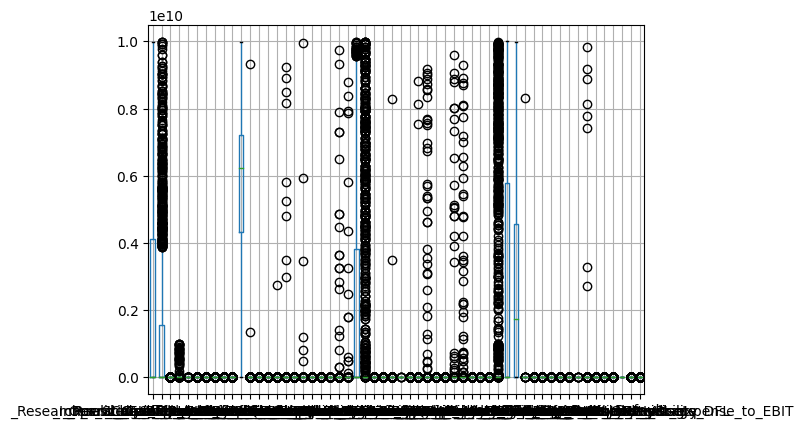

<Figure size 9000x9000 with 0 Axes>

In [12]:
Default.boxplot()
plt.figure(figsize=(90,90))

In [13]:
Default_X = Default.drop('Default', axis = 1)
Default_Y = Default['Default']

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in Default_X.columns:
    lr,ur=remove_outlier(Default[column])
    Default_X[column]=np.where(Default_X[column]>ur,ur,Default_X[column])
    Default_X[column]=np.where(Default_X[column]<lr,lr,Default_X[column])

In [16]:
Default = pd.concat([Default_X, Default_Y], axis = 1)

<Figure size 9000x9000 with 0 Axes>

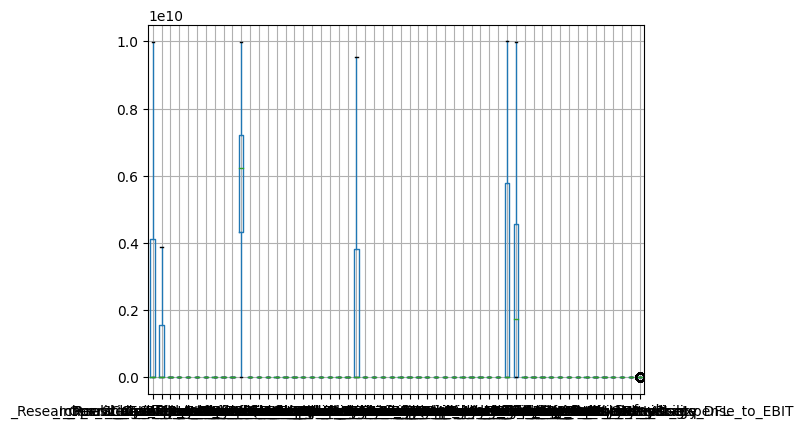

<Figure size 9000x9000 with 0 Axes>

In [17]:
Default.boxplot()
plt.figure(figsize=(90,90))

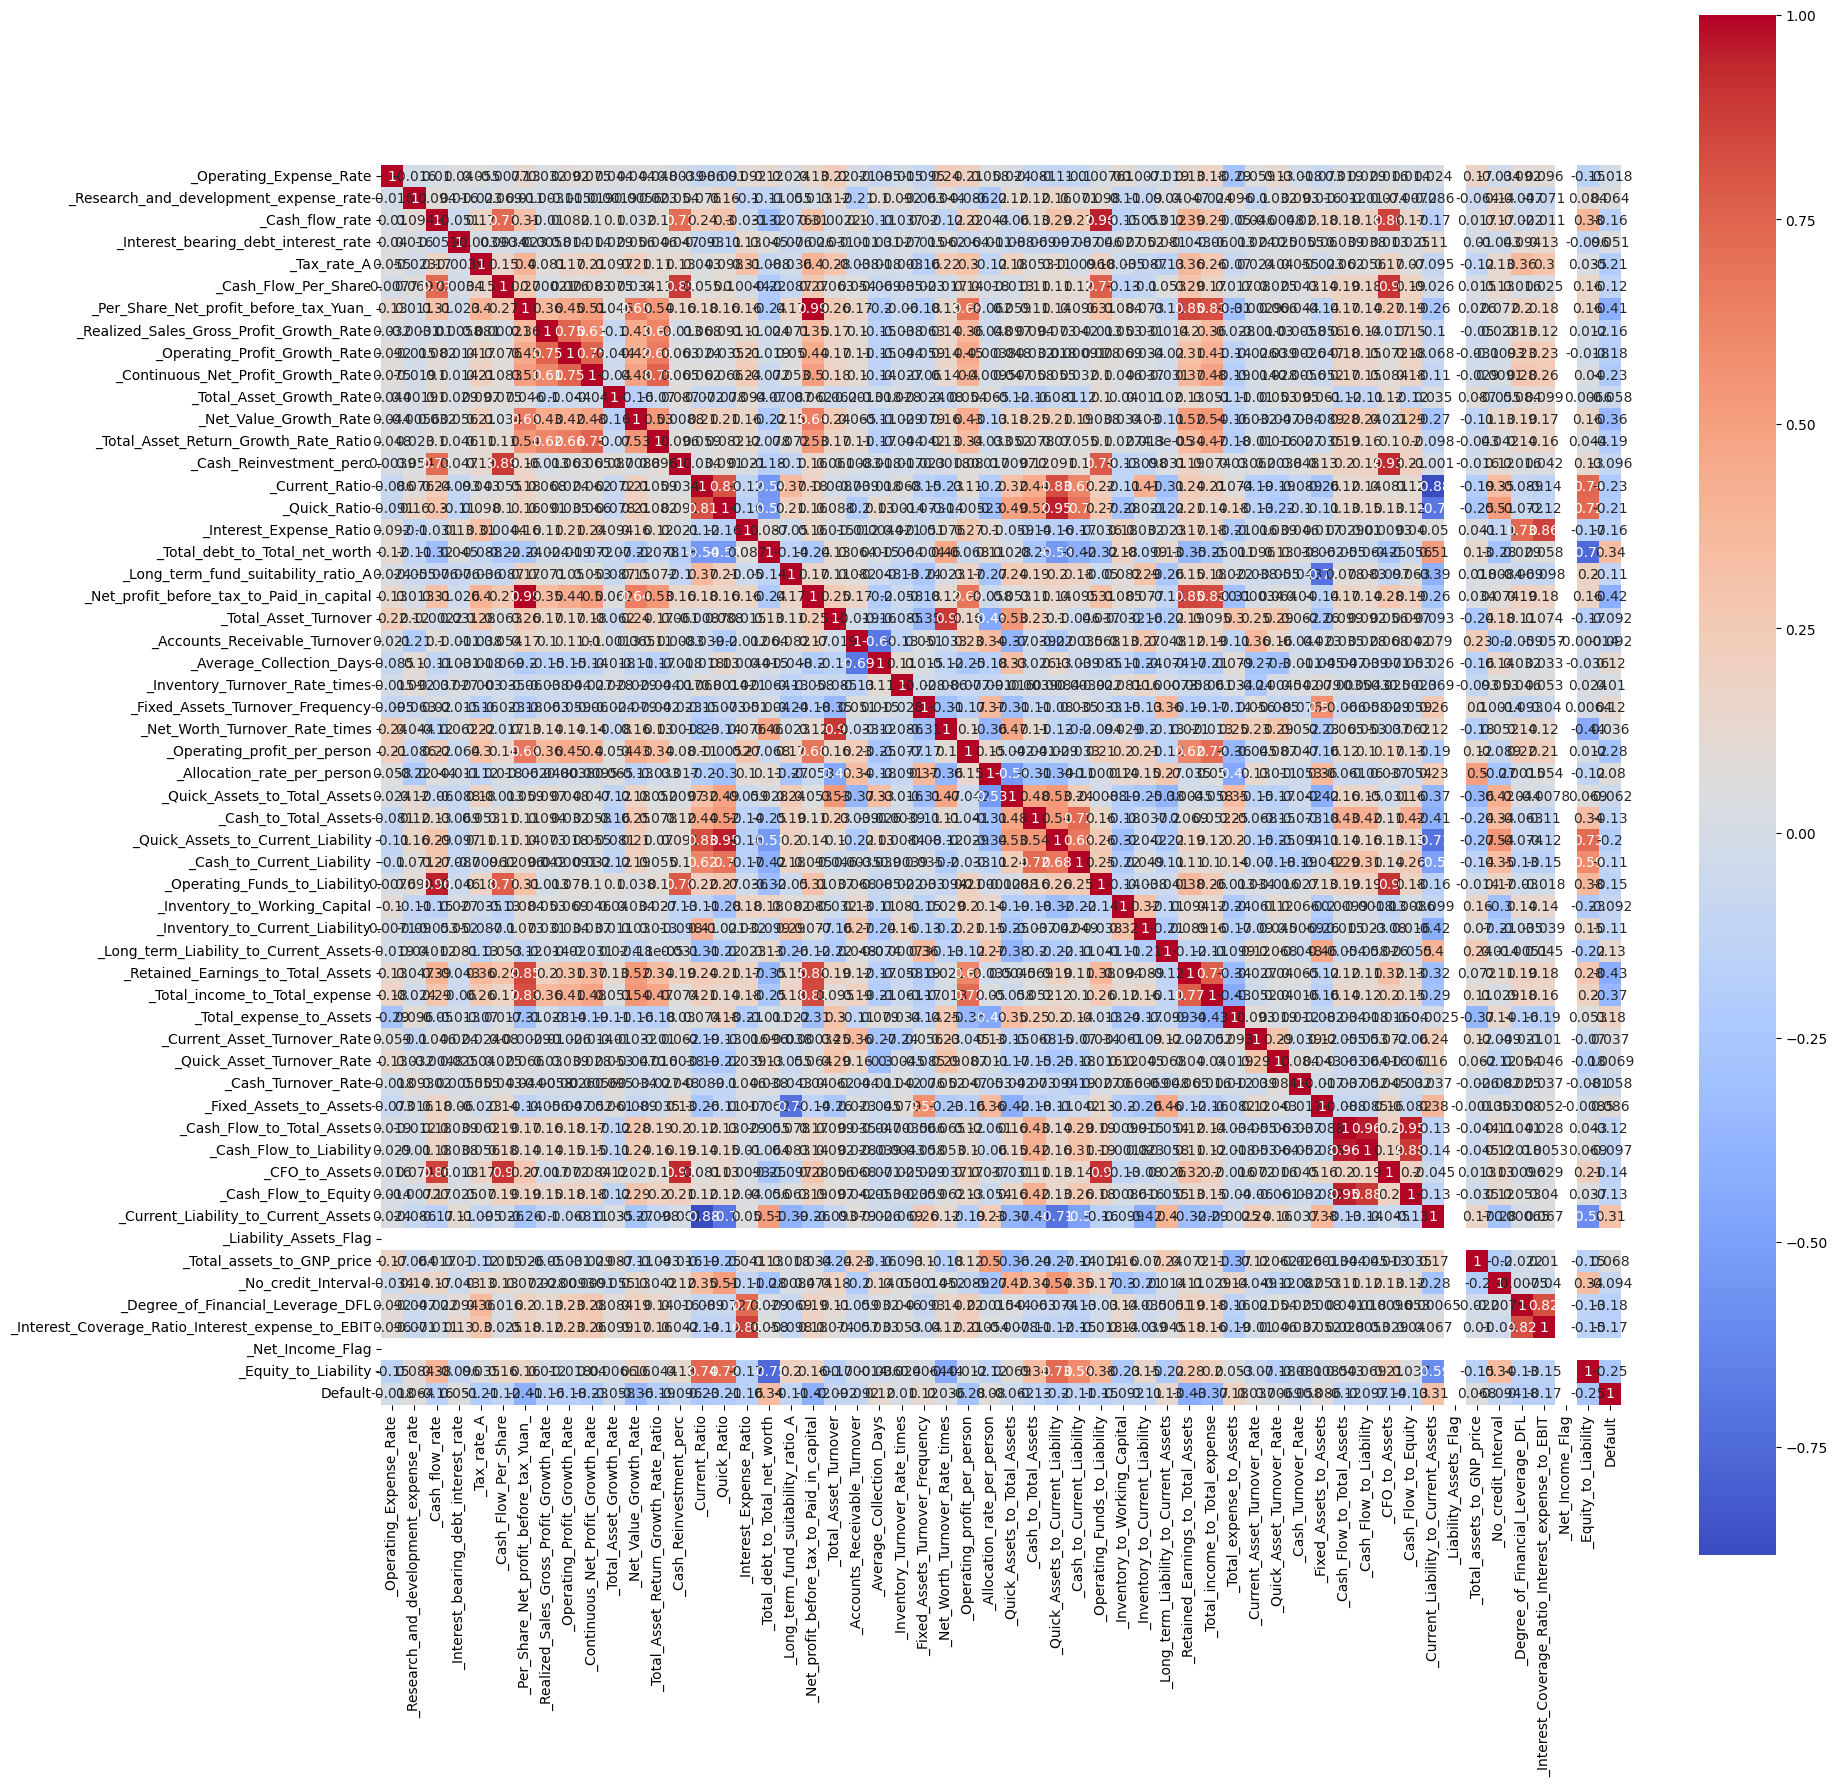

In [ ]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(20,20))  # setting the size of figure to 12 by 10
p=sns.heatmap(Default.corr(), annot=True,cmap='coolwarm',square=True)

<Axes: xlabel='Default', ylabel='count'>

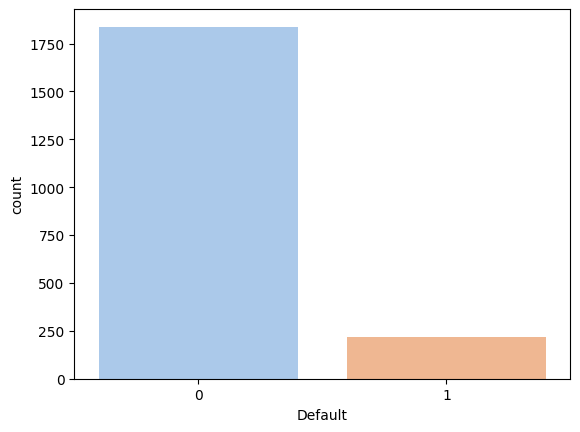

In [21]:
sns.countplot(x='Default', data=Default, palette='pastel')

<Axes: xlabel='_Current_Ratio'>

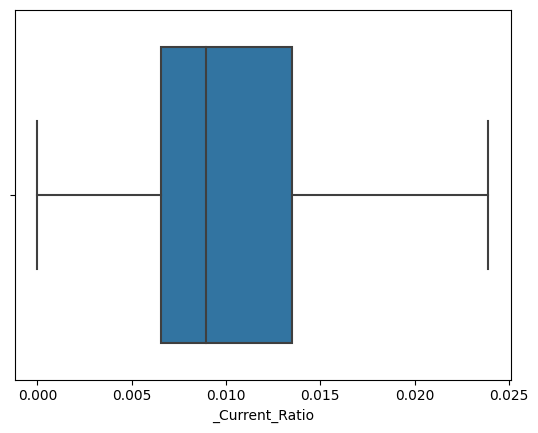

In [25]:
sns.boxplot (x= '_Current_Ratio', data= Default)

<Axes: xlabel='_Quick_Ratio'>

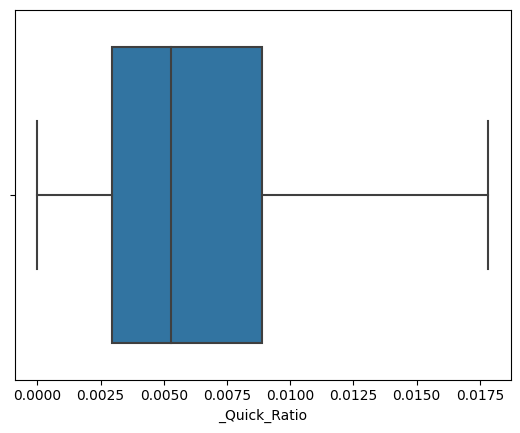

In [27]:
sns.boxplot (x= '_Quick_Ratio', data= Default)

<Axes: xlabel='Default', ylabel='_Cash_to_Total_Assets'>

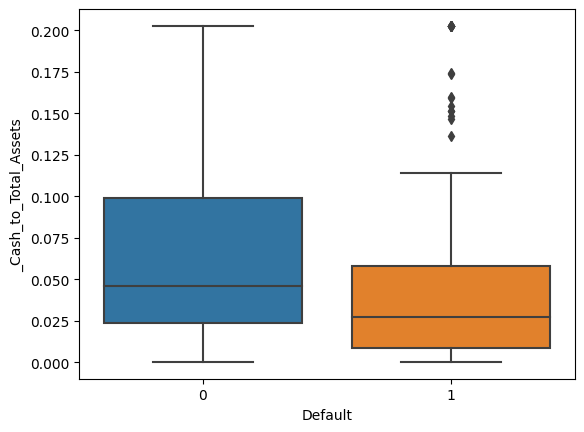

In [28]:
sns.boxplot(x='Default', y='_Cash_to_Total_Assets', data= Default)

<Axes: xlabel='Default', ylabel='_Quick_Assets_to_Total_Assets'>

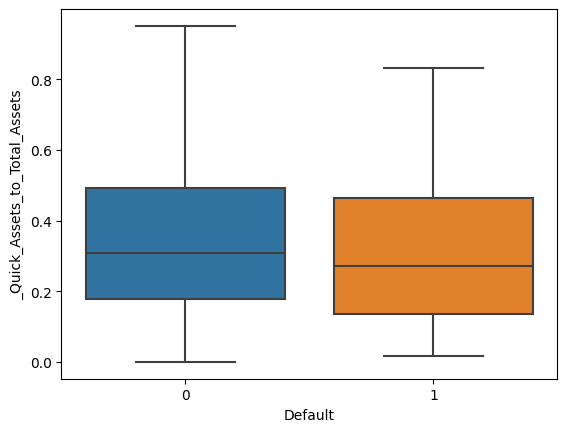

In [29]:
sns.boxplot(x='Default', y='_Quick_Assets_to_Total_Assets', data= Default)

#logistic model

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
Default.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

In [ ]:
Default.drop('_Liability_Assets_Flag', axis = 1, inplace = True)
Default.drop('_Net_Income_Flag', axis = 1, inplace = True)

In [ ]:
f_1 = 'Default ~ _Total_Asset_Growth_Rate + _Equity_to_Liability + _Cash_Flow_to_Liability + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _No_credit_Interval + _Interest_bearing_debt_interest_rate + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Total_assets_to_GNP_price + _No_credit_Interval'

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
X = Default.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,100.447569
19,_Net_profit_before_tax_to_Paid_in_capital,99.820268
43,_Cash_Flow_to_Total_Assets,44.520361
45,_CFO_to_Assets,29.024963
32,_Operating_Funds_to_Liability,21.595331
30,_Quick_Assets_to_Current_Liability,19.822143
44,_Cash_Flow_to_Liability,17.863425
2,_Cash_flow_rate,16.462191
46,_Cash_Flow_to_Equity,15.115319
25,_Net_Worth_Turnover_Rate_times,15.057673


In [36]:
X = X.drop('_Per_Share_Net_profit_before_tax_Yuan_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
42,_Cash_Flow_to_Total_Assets,44.502635
44,_CFO_to_Assets,28.816829
31,_Operating_Funds_to_Liability,21.571276
29,_Quick_Assets_to_Current_Liability,19.814707
43,_Cash_Flow_to_Liability,17.863048
2,_Cash_flow_rate,16.461142
45,_Cash_Flow_to_Equity,15.089172
24,_Net_Worth_Turnover_Rate_times,15.056049
13,_Current_Ratio,14.697253
19,_Total_Asset_Turnover,14.114446


In [37]:
X = X.drop('_Cash_Flow_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
43,_CFO_to_Assets,28.601351
31,_Operating_Funds_to_Liability,21.539408
29,_Quick_Assets_to_Current_Liability,19.787693
2,_Cash_flow_rate,16.437235
24,_Net_Worth_Turnover_Rate_times,15.055733
13,_Current_Ratio,14.687754
19,_Total_Asset_Turnover,14.112123
12,_Cash_Reinvestment_perc,12.981696
14,_Quick_Ratio,12.511076
18,_Net_profit_before_tax_to_Paid_in_capital,8.338706


In [38]:
X = X.drop('_CFO_to_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
29,_Quick_Assets_to_Current_Liability,19.783692
31,_Operating_Funds_to_Liability,18.759095
2,_Cash_flow_rate,16.050573
24,_Net_Worth_Turnover_Rate_times,15.031658
13,_Current_Ratio,14.676987
19,_Total_Asset_Turnover,14.096416
14,_Quick_Ratio,12.510250
18,_Net_profit_before_tax_to_Paid_in_capital,8.128425
44,_Current_Liability_to_Current_Assets,8.022663
12,_Cash_Reinvestment_perc,6.606886


In [39]:
X = X.drop('_Quick_Assets_to_Current_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,_Operating_Funds_to_Liability,18.604837
2,_Cash_flow_rate,15.831651
24,_Net_Worth_Turnover_Rate_times,15.007338
19,_Total_Asset_Turnover,14.014901
13,_Current_Ratio,12.945561
18,_Net_profit_before_tax_to_Paid_in_capital,8.105262
43,_Current_Liability_to_Current_Assets,7.947809
14,_Quick_Ratio,7.931658
12,_Cash_Reinvestment_perc,6.606872
48,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.085202


In [40]:
X = X.drop('_Operating_Funds_to_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,_Net_Worth_Turnover_Rate_times,14.885118
19,_Total_Asset_Turnover,13.886122
13,_Current_Ratio,12.787016
18,_Net_profit_before_tax_to_Paid_in_capital,8.064650
42,_Current_Liability_to_Current_Assets,7.936365
14,_Quick_Ratio,7.824087
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.076140
12,_Cash_Reinvestment_perc,5.874624
5,_Cash_Flow_Per_Share,5.768776
27,_Quick_Assets_to_Total_Assets,5.388628


In [41]:
X = X.drop('_Net_Worth_Turnover_Rate_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,_Current_Ratio,12.740937
18,_Net_profit_before_tax_to_Paid_in_capital,8.023664
41,_Current_Liability_to_Current_Assets,7.927515
14,_Quick_Ratio,7.764627
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.075230
12,_Cash_Reinvestment_perc,5.872123
5,_Cash_Flow_Per_Share,5.767766
26,_Quick_Assets_to_Total_Assets,5.386890
48,_Equity_to_Liability,5.316421
33,_Total_income_to_Total_expense,5.152144


In [42]:
X = X.drop('_Current_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,_Net_profit_before_tax_to_Paid_in_capital,8.014256
13,_Quick_Ratio,6.256664
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.074313
12,_Cash_Reinvestment_perc,5.869488
5,_Cash_Flow_Per_Share,5.764560
25,_Quick_Assets_to_Total_Assets,5.381609
32,_Total_income_to_Total_expense,5.151348
31,_Retained_Earnings_to_Total_Assets,5.140805
39,_Cash_Flow_to_Equity,5.139343
40,_Current_Liability_to_Current_Assets,5.026619


In [43]:
X = X.drop('_Net_profit_before_tax_to_Paid_in_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,_Quick_Ratio,6.245002
44,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.040601
12,_Cash_Reinvestment_perc,5.830880
5,_Cash_Flow_Per_Share,5.656075
24,_Quick_Assets_to_Total_Assets,5.381527
38,_Cash_Flow_to_Equity,5.106040
39,_Current_Liability_to_Current_Assets,5.022685
37,_Cash_Flow_to_Liability,4.931028
46,_Equity_to_Liability,4.822017
36,_Fixed_Assets_to_Assets,4.696869


In [44]:
X = X.drop('_Quick_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
43,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.040576
12,_Cash_Reinvestment_perc,5.830848
5,_Cash_Flow_Per_Share,5.626569
37,_Cash_Flow_to_Equity,5.105780
36,_Cash_Flow_to_Liability,4.930884
23,_Quick_Assets_to_Total_Assets,4.818787
35,_Fixed_Assets_to_Assets,4.626955
13,_Interest_Expense_Ratio,4.492185
30,_Total_income_to_Total_expense,4.349631
45,_Equity_to_Liability,4.130787


In [45]:
X = X.drop('_Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,_Cash_Reinvestment_perc,5.829617
5,_Cash_Flow_Per_Share,5.624499
37,_Cash_Flow_to_Equity,5.104304
36,_Cash_Flow_to_Liability,4.927317
23,_Quick_Assets_to_Total_Assets,4.808252
35,_Fixed_Assets_to_Assets,4.625720
30,_Total_income_to_Total_expense,4.349249
44,_Equity_to_Liability,4.123714
38,_Current_Liability_to_Current_Assets,4.054604
29,_Retained_Earnings_to_Total_Assets,3.760269


In [46]:
X = X.drop('_Cash_Reinvestment_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
36,_Cash_Flow_to_Equity,5.055551
35,_Cash_Flow_to_Liability,4.893390
22,_Quick_Assets_to_Total_Assets,4.808010
34,_Fixed_Assets_to_Assets,4.602333
29,_Total_income_to_Total_expense,4.254444
43,_Equity_to_Liability,4.117455
37,_Current_Liability_to_Current_Assets,4.031603
28,_Retained_Earnings_to_Total_Assets,3.701489
24,_Cash_to_Current_Liability,3.645729
7,_Operating_Profit_Growth_Rate,3.612193


In [47]:
X = X.drop('_Current_Liability_to_Current_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
41,_Net_Income_Flag,1.113996e+08
36,_Cash_Flow_to_Equity,5.052503e+00
35,_Cash_Flow_to_Liability,4.881583e+00
34,_Fixed_Assets_to_Assets,4.581854e+00
29,_Total_income_to_Total_expense,4.237708e+00
22,_Quick_Assets_to_Total_Assets,4.187305e+00
42,_Equity_to_Liability,3.949918e+00
28,_Retained_Earnings_to_Total_Assets,3.700953e+00
7,_Operating_Profit_Growth_Rate,3.607438e+00
24,_Cash_to_Current_Liability,3.483756e+00


In [48]:
X = X.drop('_Continuous_Net_Profit_Growth_Rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
40,_Net_Income_Flag,9.840524e+07
35,_Cash_Flow_to_Equity,5.050198e+00
34,_Cash_Flow_to_Liability,4.880046e+00
33,_Fixed_Assets_to_Assets,4.574432e+00
28,_Total_income_to_Total_expense,4.185110e+00
21,_Quick_Assets_to_Total_Assets,4.184262e+00
41,_Equity_to_Liability,3.938393e+00
27,_Retained_Earnings_to_Total_Assets,3.700022e+00
23,_Cash_to_Current_Liability,3.483585e+00
14,_Total_Asset_Turnover,3.459165e+00


In [49]:
X = X.drop('_Long_term_fund_suitability_ratio_A', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
34,_Cash_Flow_to_Equity,5.033900
33,_Cash_Flow_to_Liability,4.870390
20,_Quick_Assets_to_Total_Assets,4.178437
27,_Total_income_to_Total_expense,4.176581
40,_Equity_to_Liability,3.931614
26,_Retained_Earnings_to_Total_Assets,3.697680
22,_Cash_to_Current_Liability,3.468282
13,_Total_Asset_Turnover,3.451453
21,_Cash_to_Total_Assets,3.385895
2,_Cash_flow_rate,3.156973


In [50]:
X = X.drop('_Total_income_to_Total_expense', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
33,_Cash_Flow_to_Equity,5.032742
32,_Cash_Flow_to_Liability,4.869809
20,_Quick_Assets_to_Total_Assets,4.135038
39,_Equity_to_Liability,3.929384
22,_Cash_to_Current_Liability,3.466501
13,_Total_Asset_Turnover,3.434642
21,_Cash_to_Total_Assets,3.377949
2,_Cash_flow_rate,3.123132
26,_Retained_Earnings_to_Total_Assets,3.001155
7,_Operating_Profit_Growth_Rate,2.964041


In [51]:
X = X.drop('_Degree_of_Financial_Leverage_DFL', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
33,_Cash_Flow_to_Equity,5.030494
32,_Cash_Flow_to_Liability,4.865674
20,_Quick_Assets_to_Total_Assets,4.132156
38,_Equity_to_Liability,3.926666
22,_Cash_to_Current_Liability,3.464299
13,_Total_Asset_Turnover,3.431651
21,_Cash_to_Total_Assets,3.376493
2,_Cash_flow_rate,3.122151
26,_Retained_Earnings_to_Total_Assets,3.001251
7,_Operating_Profit_Growth_Rate,2.935545


In [52]:
X = X.drop('_Allocation_rate_per_person', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
36,_Net_Income_Flag,9.527891e+07
32,_Cash_Flow_to_Equity,5.030416e+00
31,_Cash_Flow_to_Liability,4.865621e+00
19,_Quick_Assets_to_Total_Assets,4.125793e+00
37,_Equity_to_Liability,3.912480e+00
21,_Cash_to_Current_Liability,3.432216e+00
20,_Cash_to_Total_Assets,3.359038e+00
13,_Total_Asset_Turnover,3.339427e+00
2,_Cash_flow_rate,3.119367e+00
25,_Retained_Earnings_to_Total_Assets,2.977107e+00


In [53]:
X = X.drop('_Cash_Flow_to_Equity', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
19,_Quick_Assets_to_Total_Assets,4.123054
36,_Equity_to_Liability,3.904351
21,_Cash_to_Current_Liability,3.379249
13,_Total_Asset_Turnover,3.329647
20,_Cash_to_Total_Assets,3.272361
2,_Cash_flow_rate,3.119359
25,_Retained_Earnings_to_Total_Assets,2.975568
7,_Operating_Profit_Growth_Rate,2.928153
12,_Total_debt_to_Total_net_worth,2.787798
6,_Realized_Sales_Gross_Profit_Growth_Rate,2.682545


In [54]:
X = X.drop('_Quick_Assets_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
35,_Equity_to_Liability,3.877220
20,_Cash_to_Current_Liability,3.379039
2,_Cash_flow_rate,3.116307
19,_Cash_to_Total_Assets,3.094883
24,_Retained_Earnings_to_Total_Assets,2.948996
7,_Operating_Profit_Growth_Rate,2.927630
13,_Total_Asset_Turnover,2.743334
12,_Total_debt_to_Total_net_worth,2.676252
6,_Realized_Sales_Gross_Profit_Growth_Rate,2.675551
14,_Accounts_Receivable_Turnover,2.446843


In [55]:
X = X.drop('_Operating_profit_per_person', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
33,_Net_Income_Flag,9.346091e+07
34,_Equity_to_Liability,3.844586e+00
19,_Cash_to_Current_Liability,3.377656e+00
18,_Cash_to_Total_Assets,3.085139e+00
2,_Cash_flow_rate,3.065116e+00
7,_Operating_Profit_Growth_Rate,2.873847e+00
13,_Total_Asset_Turnover,2.736652e+00
12,_Total_debt_to_Total_net_worth,2.675750e+00
6,_Realized_Sales_Gross_Profit_Growth_Rate,2.631690e+00
23,_Retained_Earnings_to_Total_Assets,2.622346e+00


In [ ]:
model_1 = SM.logit(formula = f_1, data=Default).fit()

         Current function value: 0.209178
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2035
Method:                           MLE   Df Model:                           22
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.3847
Time:                        02:46:31   Log-Likelihood:                -430.49
converged:                      False   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                7.002e-100
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  362.2679    699.317      0.518      0.604   -1008.367    1732.903
_Total_Asset_Growth_Rate                 -1.016e-11   3.59e-11     -0.283      0.777   -8.05e-11    6.02e-11
_Equity_to_Liability                       -75.4458     11.247     -6.708      0.000     -97.490     -53.402
_Cash_Flow_to_Liability                    -20.3061     52.074     -0.390      0.697    -122.369      81.757
_Cash_Flow_to_Equity                       -22.8321     46.711     -0.489      0.625    -114.383      68.719
_Total_assets_to_GNP_price                  64.5702     18.822      3.431      0.001      27.680     101.460
_No_credit_Interval                         -5.0798    131.399     -0.039      0.969    -262.618     252.458
_Interest_bearing_debt_interest_rate       718.8311    363.419      1.978      0.048       6.544    1431.118
_Cash_Flow_Per_Share                       -15.0624     11.404     -1.321      0.187     -37.413       7.289
_Realized_Sales_Gross_Profit_Growth_Rate -2440.0055   1208.264     -2.019      0.043   -4808.159     -71.852
_Operating_Profit_Growth_Rate             -203.0914    837.351     -0.243      0.808   -1844.269    1438.087
_Quick_Assets_to_Total_Assets               -0.7219      0.747     -0.966      0.334      -2.186       0.742
_Cash_to_Total_Assets                       -4.3054      2.498     -1.724      0.085      -9.201       0.590
_Cash_to_Current_Liability                  44.3261     23.270      1.905      0.057      -1.281      89.934
_Inventory_to_Working_Capital              -88.1228    130.210     -0.677      0.499    -343.330     167.084
_Inventory_to_Current_Liability            -22.7397     17.648     -1.289      0.198     -57.329      11.850
_Long_term_Liability_to_Current_Assets      -3.9209     12.176     -0.322      0.747     -27.785      19.943
_Retained_Earnings_to_Total_Assets         -94.5936     10.061     -9.402      0.000    -114.312     -74.875
_Total_expense_to_Assets                    12.9565      6.139      2.111      0.035       0.925      24.988
_Current_Asset_Turnover_Rate              -130.4089     83.152     -1.568      0.117    -293.383      32.565
_Quick_Asset_Turnover_Rate                 -1.3e-11   2.75e-11     -0.472      0.637   -6.69e-11    4.09e-11
_Cash_Turnover_Rate                      -6.359e-11    3.7e-11     -1.718      0.086   -1.36e-10    8.97e-12
_Fixed_Assets_to_Assets                      0.2282      0.568      0.402      0.688      -0.885       1.341
============================================================================================================
"""

In [ ]:
model_2 = SM.logit(formula = f_2, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.209514
         Iterations 18


In [ ]:
f_2 = 'Default ~ _Equity_to_Liability + _Total_assets_to_GNP_price + _No_credit_Interval + _Interest_bearing_debt_interest_rate + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Retained_Earnings_to_Total_Assets + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _Total_assets_to_GNP_price'

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2042
Method:                           MLE   Df Model:                           15
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.3838
Time:                        02:56:30   Log-Likelihood:                -431.18
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                8.225e-105
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  173.0456     77.489      2.233      0.026      21.169     324.922
_Equity_to_Liability                       -74.5210     10.955     -6.802      0.000     -95.993     -53.049
_Total_assets_to_GNP_price                  62.3680     18.018      3.461      0.001      27.053      97.683
_No_credit_Interval                         -0.3742    120.949     -0.003      0.998    -237.430     236.681
_Interest_bearing_debt_interest_rate       716.3612    362.499      1.976      0.048       5.876    1426.846
_Cash_Flow_Per_Share                       -15.1024     11.169     -1.352      0.176     -36.994       6.789
_Realized_Sales_Gross_Profit_Growth_Rate -2670.7410    877.688     -3.043      0.002   -4390.977    -950.505
_Quick_Assets_to_Total_Assets               -0.8096      0.555     -1.458      0.145      -1.898       0.278
_Cash_to_Total_Assets                       -4.3295      2.481     -1.745      0.081      -9.192       0.533
_Cash_to_Current_Liability                  46.4223     23.136      2.007      0.045       1.077      91.768
_Inventory_to_Current_Liability            -28.4465     15.194     -1.872      0.061     -58.227       1.334
_Retained_Earnings_to_Total_Assets         -97.0186      9.703     -9.999      0.000    -116.035     -78.002
_Total_expense_to_Assets                    12.9628      5.775      2.245      0.025       1.645      24.281
_Current_Asset_Turnover_Rate              -129.0086     80.159     -1.609      0.108    -286.118      28.101
_Cash_Turnover_Rate                       -6.42e-11   3.68e-11     -1.742      0.081   -1.36e-10    8.02e-12
_Cash_Flow_to_Liability                    -42.5207     27.792     -1.530      0.126     -96.992      11.951
============================================================================================================
"""

In [ ]:
f_3 = 'Default ~ _Equity_to_Liability + _Total_assets_to_GNP_price + _Interest_bearing_debt_interest_rate + _Realized_Sales_Gross_Profit_Growth_Rate + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Retained_Earnings_to_Total_Assets + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _Total_assets_to_GNP_price'

In [ ]:
model_3 = SM.logit(formula = f_3, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.210442
         Iterations 18


In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2045
Method:                           MLE   Df Model:                           12
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.3810
Time:                        03:01:16   Log-Likelihood:                -433.09
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                1.888e-106
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  174.8251     22.736      7.689      0.000     130.264     219.386
_Equity_to_Liability                       -73.0601     10.476     -6.974      0.000     -93.592     -52.528
_Total_assets_to_GNP_price                  65.9749     17.637      3.741      0.000      31.407     100.543
_Interest_bearing_debt_interest_rate       757.8037    353.973      2.141      0.032      64.030    1451.577
_Realized_Sales_Gross_Profit_Growth_Rate -2734.3940    877.536     -3.116      0.002   -4454.333   -1014.455
_Cash_to_Total_Assets                       -5.4870      2.296     -2.390      0.017      -9.987      -0.987
_Cash_to_Current_Liability                  49.1181     22.990      2.136      0.033       4.058      94.179
_Inventory_to_Current_Liability            -19.4327     13.992     -1.389      0.165     -46.857       7.992
_Retained_Earnings_to_Total_Assets        -101.5508      9.400    -10.804      0.000    -119.974     -83.128
_Total_expense_to_Assets                    11.1171      5.623      1.977      0.048       0.096      22.138
_Current_Asset_Turnover_Rate              -116.4870     78.592     -1.482      0.138    -270.525      37.551
_Cash_Turnover_Rate                      -5.967e-11   3.65e-11     -1.635      0.102   -1.31e-10    1.19e-11
_Cash_Flow_to_Liability                    -45.8916     27.197     -1.687      0.092     -99.196       7.413
============================================================================================================
"""

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y = Default['Default']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [58]:
X_train

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,...,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Liability,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Net_Income_Flag,_Equity_to_Liability
631,1.053450e-04,3.875000e+09,0.462934,0.000382,0.000000,0.321391,0.022051,0.847945,6.730000e+09,0.000429,...,0.002934,5.920000e+09,2.260000e+09,0.240109,0.458462,0.0,0.014029,0.623649,1.0,0.021426
1799,1.569190e-04,0.000000e+00,0.480024,0.001244,0.000000,0.318208,0.022082,0.847962,7.400000e+09,0.000496,...,0.000194,1.777050e-04,3.602170e-04,0.243193,0.468138,0.0,0.000407,0.625104,1.0,0.077970
1924,5.556330e-04,0.000000e+00,0.480024,0.000191,0.244762,0.328429,0.022100,0.848022,5.500000e+09,0.000447,...,0.002934,3.160000e+09,3.330000e+09,0.359532,0.451086,0.0,0.003315,0.623745,1.0,0.055306
1629,8.520000e+08,3.460000e+09,0.463998,0.000724,0.124203,0.324043,0.022089,0.847973,9.180000e+09,0.000473,...,0.000116,9.960000e+09,1.666360e-04,0.063333,0.468138,0.0,0.016143,0.623962,1.0,0.022519
363,7.870000e+09,0.000000e+00,0.480024,0.000391,0.075514,0.322664,0.021931,0.847832,6.470000e+09,0.000452,...,0.000295,1.005190e-04,1.230000e+09,0.230249,0.451086,0.0,0.002201,0.622251,1.0,0.077970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,8.480000e+09,5.090000e+07,0.460247,0.000842,0.000000,0.313185,0.022149,0.848326,6.540000e+08,0.000418,...,0.002934,5.430000e+09,4.230000e+08,0.282043,0.457681,0.0,0.003011,0.623183,1.0,0.015349
1095,2.693170e-04,3.875000e+09,0.480024,0.000000,0.196882,0.320648,0.022121,0.848055,6.830000e+09,0.000445,...,0.000330,2.951610e-04,3.170730e-04,0.317288,0.468138,0.0,0.000439,0.624438,1.0,0.077970
1130,2.932540e-04,3.875000e+09,0.459425,0.000636,0.000000,0.312619,0.022075,0.847994,6.630000e+09,0.000439,...,0.000270,1.694170e-04,3.330000e+09,0.274366,0.455500,0.0,0.001287,0.623500,1.0,0.021630
1294,6.880000e+09,0.000000e+00,0.464892,0.000229,0.025407,0.327934,0.022065,0.848001,6.280000e+09,0.000428,...,0.000271,1.263760e-04,6.490000e+09,0.206830,0.459962,0.0,0.016143,0.622418,1.0,0.025955


In [59]:
y_train

631     0
1799    0
1924    0
1629    0
363     0
       ..
1638    1
1095    0
1130    1
1294    0
860     0
Name: Default, Length: 1378, dtype: int64

In [ ]:
y_prob_pred_train = model_3.predict(Default_train)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics

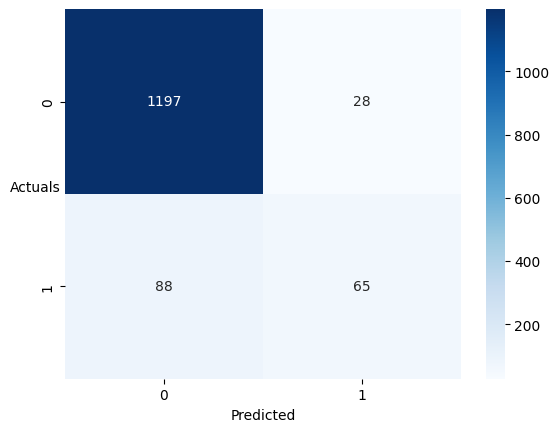

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
65/153

0.42483660130718953

In [ ]:
65/93

0.6989247311827957

In [ ]:
y_prob_pred_4 = model_3.predict()

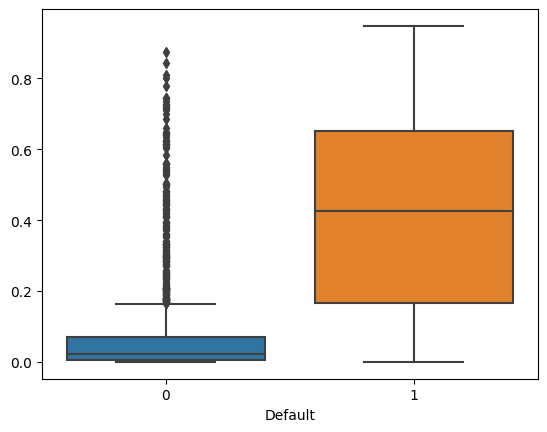

In [ ]:
sns.boxplot(x=Default['Default'],y=y_prob_pred_4)
plt.xlabel('Default');

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.10595156052895868

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

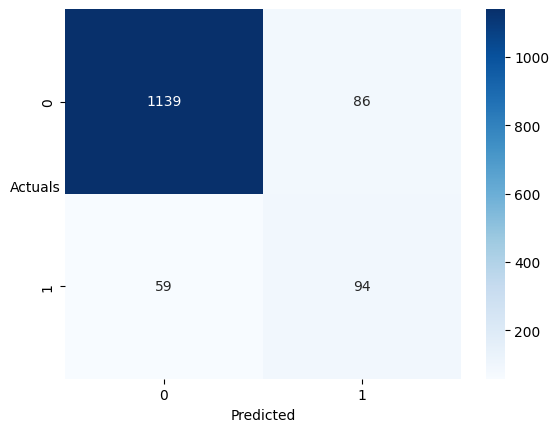

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.951     0.930     0.940      1225
           1      0.522     0.614     0.565       153

    accuracy                          0.895      1378
   macro avg      0.736     0.772     0.752      1378
weighted avg      0.903     0.895     0.898      1378



In [ ]:
y_prob_pred_test = model_3.predict(Default_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

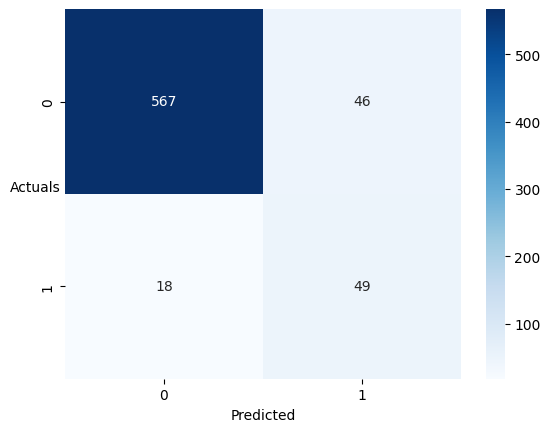

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.969     0.925     0.947       613
           1      0.516     0.731     0.605        67

    accuracy                          0.906       680
   macro avg      0.743     0.828     0.776       680
weighted avg      0.925     0.906     0.913       680



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
lda_model = LDA.fit(X_train, y_train)

In [ ]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1225
           1       0.63      0.55      0.59       153

    accuracy                           0.91      1378
   macro avg       0.79      0.75      0.77      1378
weighted avg       0.91      0.91      0.91      1378



In [ ]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       613
           1       0.57      0.61      0.59        67

    accuracy                           0.92       680
   macro avg       0.76      0.78      0.77       680
weighted avg       0.92      0.92      0.92       680



In [ ]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06378269547371632

In [ ]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

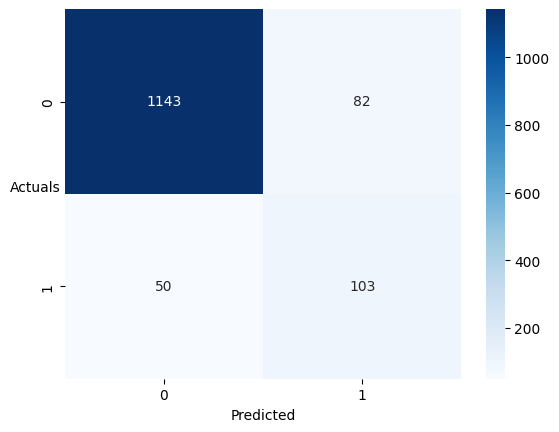

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.958     0.933     0.945      1225
           1      0.557     0.673     0.609       153

    accuracy                          0.904      1378
   macro avg      0.757     0.803     0.777      1378
weighted avg      0.914     0.904     0.908      1378



In [ ]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

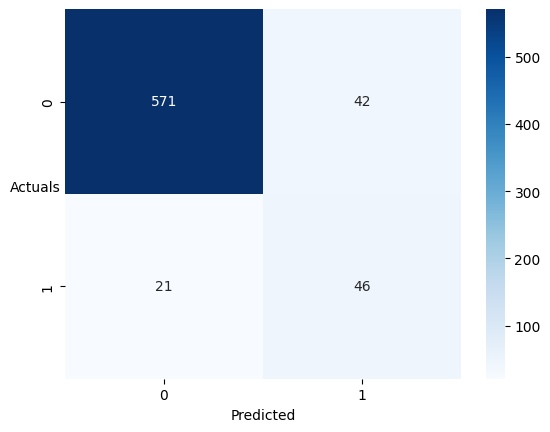

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.965     0.931     0.948       613
           1      0.523     0.687     0.594        67

    accuracy                          0.907       680
   macro avg      0.744     0.809     0.771       680
weighted avg      0.921     0.907     0.913       680



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [ ]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 50}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1225
           1       0.87      0.48      0.62       153

    accuracy                           0.93      1378
   macro avg       0.90      0.73      0.79      1378
weighted avg       0.93      0.93      0.93      1378



In [ ]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       613
           1       0.62      0.37      0.47        67

    accuracy                           0.92       680
   macro avg       0.78      0.67      0.71       680
weighted avg       0.90      0.92      0.91       680



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

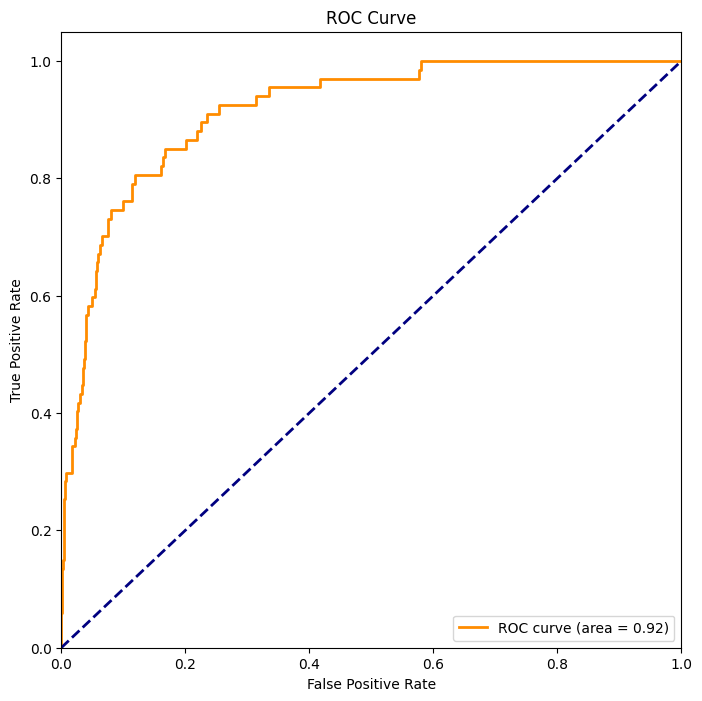

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the actual labels and y_scores contains the predicted scores
y_true = Default_test['Default']
y_scores = model_3.predict(Default_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#problem2

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [61]:
#import os
#os.chdir('F:/Data science/GL/FRA/')
#os.getcwd()

In [62]:
stock_prices = pd.read_csv('/content/Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [63]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&', '_')

In [64]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [65]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [66]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra___Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [67]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


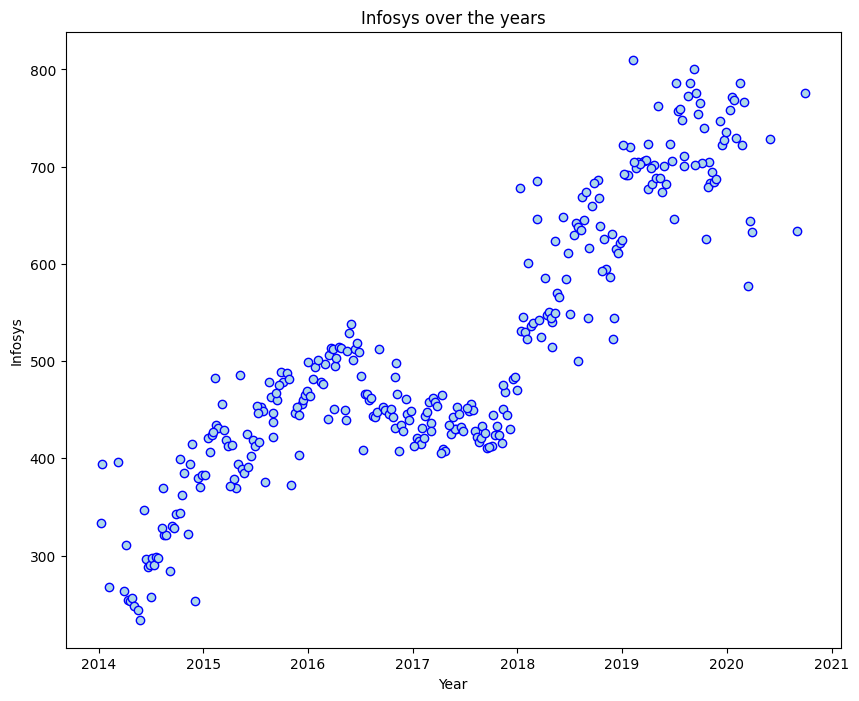

In [68]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

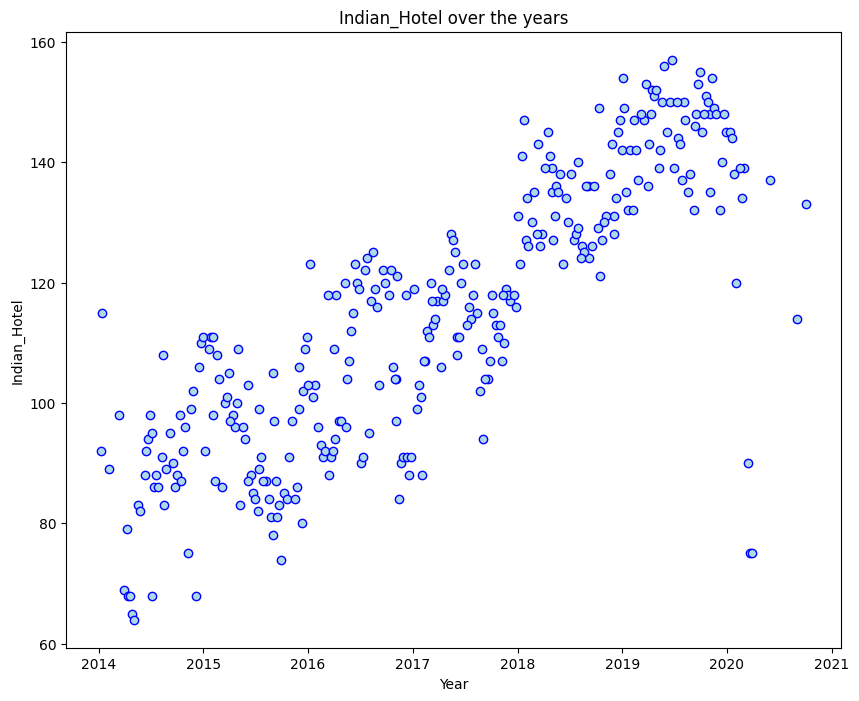

In [69]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Indian_Hotel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Indian_Hotel')
plt.title('Indian_Hotel over the years')
plt.show()

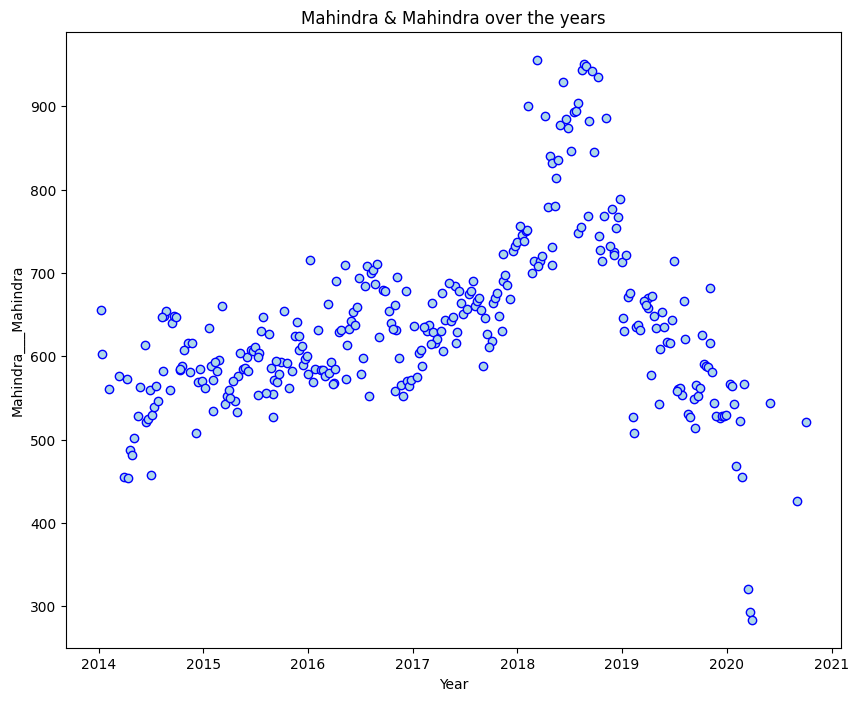

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra___Mahindra'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Mahindra___Mahindra')
plt.title('Mahindra & Mahindra over the years')
plt.show()

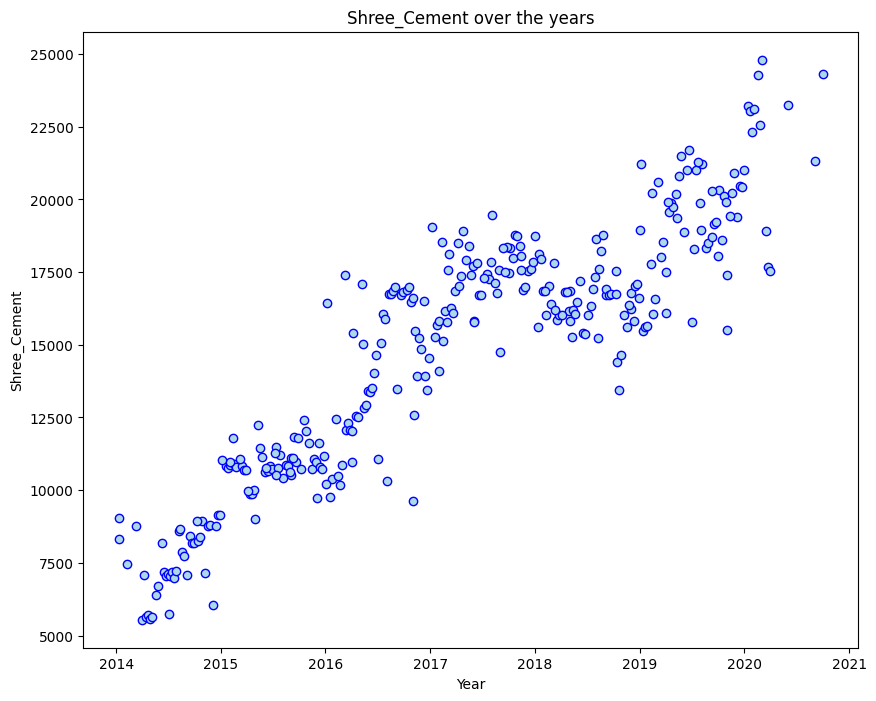

In [ ]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Shree_Cement'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree_Cement over the years')
plt.show()

In [70]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [71]:
stock_returns.shape

(314, 10)

In [72]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra___Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [73]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra___Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [74]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra___Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [75]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra___Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


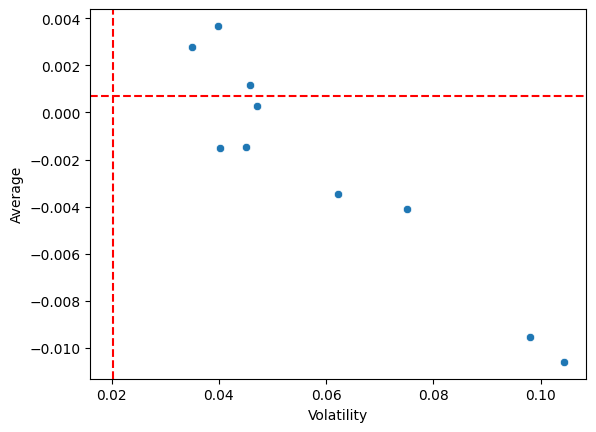

In [76]:
plot = sns.scatterplot(data=df, x='Volatility', y='Average', edgecolors='r')
plot.axvline(x=0.020257, linestyle='--', color="red")
plot.axhline(y=0.000683, linestyle='--', color="red")
plt.show()

In [77]:
df[df['Average'] > 0.000].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
